### An analysis of all 123 Hapoel Jerusalem vs Maccabi Tel-Aviv league Games (games played between the years 1955-2019) by decades:
1. How have win rate for each team changed over the years? 
2. Is the reltaive amount of games with close ending score (difference of 2 ball posseions-ie.6 points or less-in the final game score) correlates with win rate difference between the teams ?
3. "HOME GAME EFFECT" How is win rate effected by the place the game was played at (Home or Away) - is the effect different for tlv and jeruslaem? has the effect changed over the decades? 

data was collected from Basket.co.il (https://basket.co.il/opponents.asp?cTeam1=8&cTeam2=10&StatsBoard=0&stats_options=1&ReportYear=0)

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
plt.rcParams['axes.facecolor'] = '1'
plt.rcParams["figure.dpi"] = 100.


def autolabel(rects,offset,sign = ''):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(str(int(height))+sign),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, offset),  # offset points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=7)

In [390]:
h_m = pd.read_excel(r'C:\Users\royru\Desktop\primrose\github\coursera\hapoel-macabi.xlsx')
h_m.head()

,Game,date,houe,court,housr,guest,score
0,1,1955-05-20,NaN,ירושלים,הפועל ירושלים הפועל ירושלים,NaN,NaN
1,מכבי תל אביב מכבי תל אביב,NaT,NaN,NaN,NaN,NaN,NaN
2,86 - 46,NaT,NaN,NaN,NaN,NaN,NaN
3,2,1955-10-07,NaN,"ת""א",מכבי תל אביב מכבי תל אביב,NaN,NaN
4,הפועל ירושלים הפועל ירושלים,NaT,NaN,NaN,NaN,NaN,NaN


In [391]:
# Sort data from column 'Game' to correct columns"
h_m['score'] = h_m['Game']
# medium sized values are Game score
h_m['score'] = h_m['score'].apply(lambda x: x if (len(str(x)) > 4 and (len(str(x)) < 10 )) else None)
for i in range (0,len(h_m.index)-2):
    h_m['score'].iloc[i] = h_m['score'].iloc[i+2]
#short valuse are Game #
h_m['Game'] = h_m['Game'].apply(lambda x: x if (len(str(x)) <4) else None)
h_m = h_m[['Game', 'date', 'housr', 'score']]
game = set(list(h_m['Game']))
game_arange = set(list(np.arange(0,125)))
print (game_arange - game)
h_m = h_m.dropna(how = 'any')
game = set(list(h_m['Game']))
game_arange = set(list(np.arange(0,125)))
print (game_arange - game)
#Games played in Jer 
h_m['inJerusalem'] = h_m['housr'].apply(lambda x: 1 if x[0] =='ה' else 0)
#Games played in TLV 
h_m['inTlv'] = h_m['housr'].apply(lambda x: 1 if x[0] =='מ' else 0)
#make sure all games are either in jerualem or in tel aviv
h_m['assert'] = h_m['inJerusalem']+h_m['inTlv']
if len(h_m.loc[h_m['assert'] != 1]):
    print ('Game location Error')
else : 
    print ('Game location assertion OK')
h_m = h_m.drop(labels=['assert','housr'], axis = 1)
# sort data in score_column to home_score and guest_score - columns
h_m['home_score'] = h_m['score'].apply(lambda x: int(x.split('-')[1]))
h_m['guest_score'] = h_m['score'].apply(lambda x: int(x.split('-')[0]))
# if home team scored more then guest-team and game was played in tel-aviv - TLV-WIN
h_m['tlv_win'] = h_m.loc[h_m['inTlv'] == 1].apply(lambda x: 1 if (int(x['home_score']) > int(x['guest_score'])) else 0 , axis = 1)
# for games NOT played in TLV , If guest team scored more then home team - TLV-WIN
h_m['tlv_win'].loc[h_m['inTlv'] == 0] = h_m.loc[h_m['inTlv'] == 0].apply(lambda x: int(1) if (int(x['home_score']) < int(x['guest_score'])) else int(0) , axis = 1)
# If tlv-win == 0 - Jer Win
h_m['jer_win'] = h_m['tlv_win'].apply(lambda x: int(1) if int(x) == 0 else int(0))
h_m['points_scored_by_hapoel'] = h_m.apply(lambda x: x['home_score'] if x['inJerusalem'] else x['guest_score'], axis = 1)
h_m['points_scored_by_maccabi'] = h_m.apply(lambda x: x['home_score'] if x['inTlv'] else x['guest_score'], axis = 1)
h_m['total_game_points'] = h_m['points_scored_by_hapoel']+h_m['points_scored_by_maccabi']
h_m['close_finish_game'] = h_m.apply(lambda x: 1 if abs(x['points_scored_by_hapoel']-x['points_scored_by_maccabi'])<= 6 else 0, axis =1)
h_m['year'] = h_m['date'].apply(lambda x: x.year)
# Only games played in TLV:
h_m_tlv = h_m.loc[h_m['inTlv'] ==1]
# Only games played in Jerusalem:
h_m_jer = h_m.loc[h_m['inJerusalem'] ==1]
h_m.head(900)

C:\Users\royru\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{0, 124}
{0, 124}
Game location assertion OK


,Game,date,score,inJerusalem,inTlv,home_score,guest_score,tlv_win,jer_win,points_scored_by_hapoel,points_scored_by_maccabi,total_game_points,close_finish_game,year
0,1.0,1955-05-20,86 - 46,1,0,46,86,1.0,0,46,86,132,0,1955
3,2.0,1955-10-07,39 - 83,0,1,83,39,1.0,0,39,83,122,0,1955
6,3.0,1957-12-21,56 - 35,1,0,35,56,1.0,0,35,56,91,0,1957
9,4.0,1958-06-21,53 - 69,0,1,69,53,1.0,0,53,69,122,0,1958
12,5.0,1959-02-28,69 - 62,1,0,62,69,1.0,0,62,69,131,0,1959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,119.0,2018-04-22,82 - 81,0,1,81,82,0.0,1,82,81,163,1,2018
357,120.0,2018-12-15,78 - 91,0,1,91,78,1.0,0,78,91,169,0,2018
360,121.0,2019-03-10,89 - 78,1,0,78,89,1.0,0,78,89,167,0,2019
363,122.0,2019-04-08,92 - 98,1,0,98,92,0.0,1,98,92,190,1,2019


In [412]:
# win rate over the decades
hm=h_m.set_index('date')
hm = hm.resample('10AS').sum()
hm['total_games'] = hm['jer_win']+hm['tlv_win']
hm['jer_win_rate'] = 100*hm['jer_win']/hm['total_games']
hm['tlv_win_rate'] = 100*hm['tlv_win']/hm['total_games']
hm['close_finish_rate'] = 100*hm['close_finish_game']/hm['total_games']
hm.head(10)

maccabi_wins = int(h_m['tlv_win'].sum())
hapoel_wins = int(h_m['jer_win'].sum())
total_games = int(maccabi_wins+hapoel_wins)
maccabi_winrate = str(maccabi_wins*100/total_games)[:5]
hapoel_winrate = str(hapoel_wins*100/total_games)[:5]
avg_score_for_maccabi = str(h_m['points_scored_by_maccabi'].sum()/total_games)[:5]
avg_score_for_hapoel = str(h_m['points_scored_by_hapoel'].sum()/total_games)[:5]
print ('Some statistics to start with:')
print ('total games played : ', int(total_games))
print ('# of games won by Maccbi:{}\n % of games won by maccabi {}'
       .format(maccabi_wins,maccabi_winrate))
print ('# of games won by Hapoel:{}\n % of games won by Hapoel {}'
       .format(hapoel_wins,hapoel_winrate))
print ('avg score per game for Maccabi in games against hapoel:{}\n avg score per game for Hapoel:{}.'
       .format(avg_score_for_maccabi,avg_score_for_hapoel))


some statistics to start with:
total games played :  123
# of games won by Maccbi:99
 % of games won by maccabi 80.48
# of games won by Hapoel:24
 % of games won by Hapoel 19.51
avg score per game for Maccabi in games against hapoel:87.21
 avg score per game for Hapoel:73.37.


# How have the win percentages for each team changed over the years

<IPython.core.display.Javascript object>


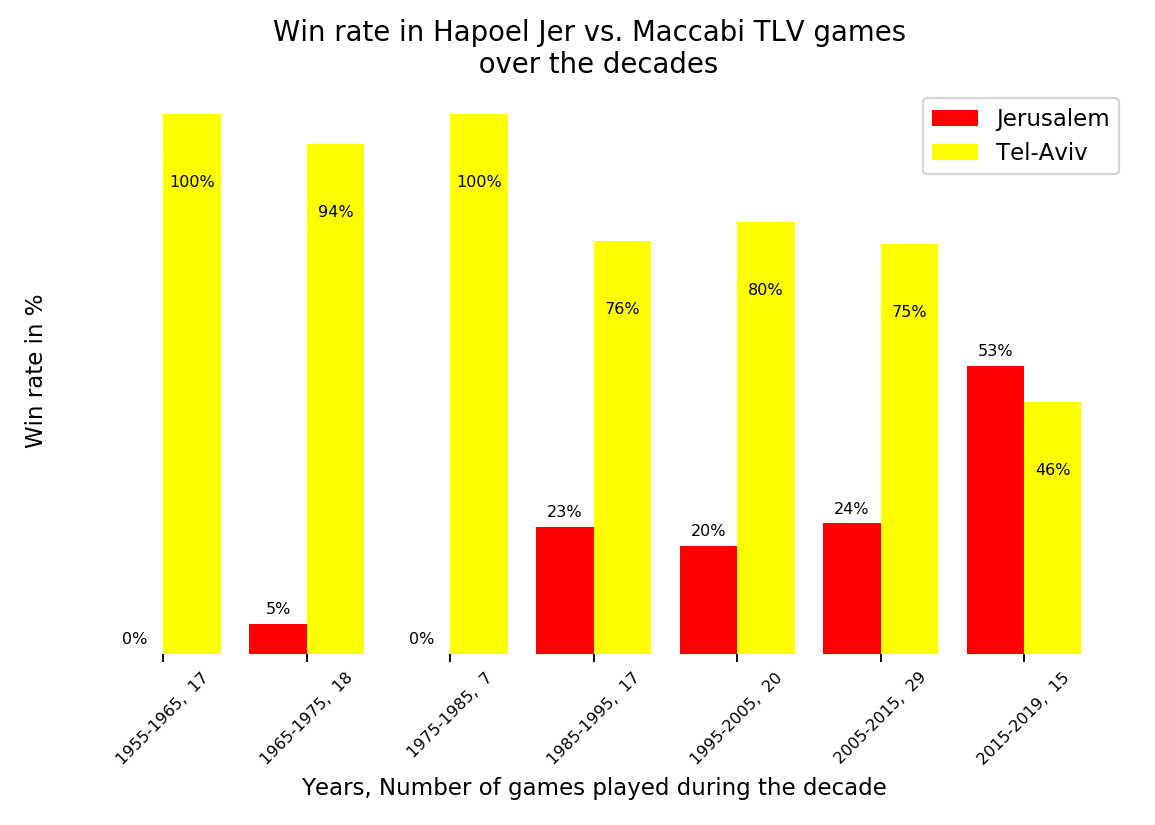

In [413]:
fig = plt.figure(figsize=(7,5))
ax = plt.gca()
jer_means = hm['jer_win_rate']
tlv_means = hm['tlv_win_rate']
plt.title('Win rate in Hapoel Jer vs. Maccabi TLV games \n over the decades')
plt.legend(labels = ['Jerusale win rate', 'Tel-Aviv win rate'])
a = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
x = np.arange(len(jer_means))  # the label locations
width = 0.4  # the width of the bars
ax = plt.gca()
rects1 = ax.bar(x - width/2, jer_means, width, label='Jerusalem', color='red')
rects2 = ax.bar(x + width/2, tlv_means, width, label='Tel-Aviv' ,  color='yellow')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win rate in %')
ax.set_xticks(x)
for i,text in enumerate (a):
    number_of_games = ',  '+str(hm['total_games'].iloc[i])[:-2]
    a[i] = text+number_of_games
ax.set_xticklabels(a)
plt.xticks(rotation='45', size = 7)
plt.xlabel(xlabel = 'Years, Number of games played during the decade')
ax.set_yticks([])
# remove spine of plot. 
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.legend()
autolabel(rects1,3,'%')
autolabel(rects2,-33,'%')
plt.tight_layout()
plt.show()



In [414]:
hm=h_m.set_index('date')
hm = hm.resample('10AS').sum()
hm['total_games'] = hm['jer_win']+hm['tlv_win']
hm['jer_win_rate'] = 100*hm['jer_win']/(hm['total_games'])
hm['tlv_win_rate'] = 100*hm['tlv_win']/(hm['total_games'])
hm['close_finish_rate'] = 100*hm['close_finish_game']/(hm['total_games'])
hm.head(10)
win_rate_difference = abs(hm['jer_win_rate']-hm['tlv_win_rate'])
close_finish_rate = hm['close_finish_rate']
xinput = win_rate_difference.to_numpy().reshape(-1,1)
yinput = close_finish_rate.to_numpy().reshape(-1,1)
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(xinput,yinput)
x = np.arange(10)
y = np.random.randint(0,2,10)
r , p = pearsonr(win_rate_difference,close_finish_rate)
rx_line = np.arange(1,100,1).reshape(-1,1)
ry_line = linear_regressor.predict(rx_line)

<IPython.core.display.Javascript object>


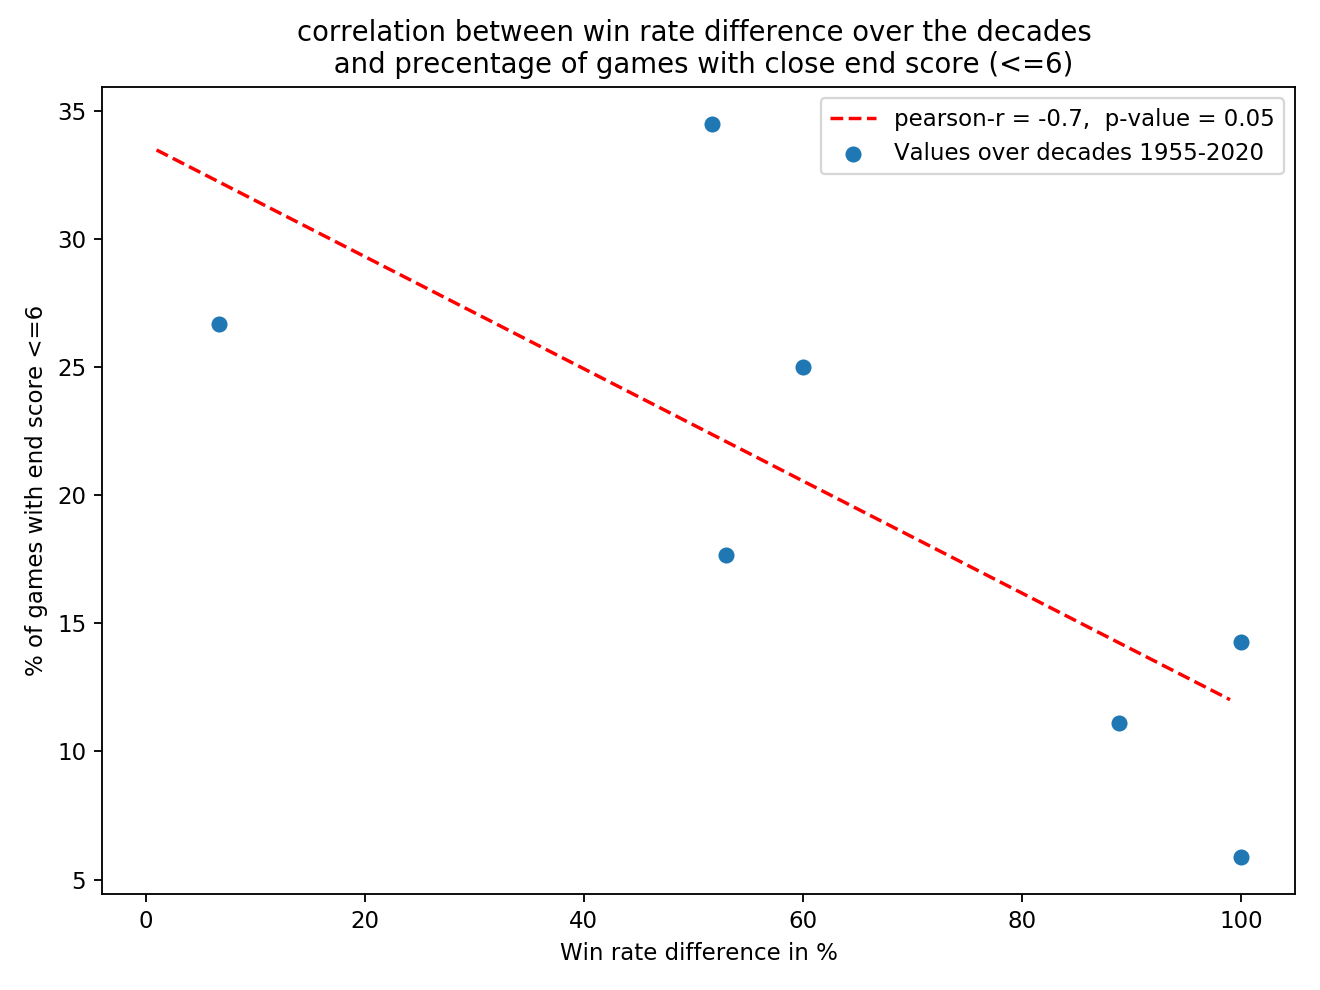

In [415]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
plt.title('correlation between win rate difference over the decades \n and precentage of games with close end score (<=6)')
line1 = ax.scatter(win_rate_difference,close_finish_rate, label = 'Values over decades 1955-2020')
r_line = ax.plot(rx_line,ry_line, '--r', label = 'pearson-r = {},  p-value = {}'.format(str(r)[:4],str(p)[:4]))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Win rate difference in %')
ax.set_ylabel('% of games with end score <=6')
ax.legend()
plt.tight_layout()
plt.show()


In [416]:
list_arrays = [h_m,h_m_tlv,h_m_jer]
list_dfs = list_arrays.copy()
for i,df in enumerate(list_dfs):
    list_dfs[i] = list_dfs[i].set_index('date')
    list_dfs[i] = list_dfs[i].resample('10AS').sum()
    list_dfs[i]['total_games'] = list_dfs[i]['inTlv']+list_dfs[i]['inJerusalem']


In [417]:
hm=h_m.set_index('date')
hm = hm.resample('10AS').sum()
hm['total_games'] = hm['jer_win']+hm['tlv_win']
hm['jer_win_rate'] = 100*hm['jer_win']/hm['total_games']
hm['avg_points_scored'] = hm['total_game_points']/hm['total_games']
hm['avg_close_games'] = 100*hm['close_finish_game']/hm['total_games']
hm.head()

,Game,inJerusalem,inTlv,home_score,guest_score,tlv_win,jer_win,points_scored_by_hapoel,points_scored_by_maccabi,total_game_points,close_finish_game,year,total_games,jer_win_rate,avg_points_scored,avg_close_games
date,,,,,,,,,,,,,,,,
1955-01-01,153.0,9,8,1080,1038,17.0,0,851,1267,2118,1,33326,17.0,0.000000,124.588235,5.882353
1965-01-01,477.0,9,9,1488,1404,17.0,1,1283,1609,2892,2,35441,18.0,5.555556,160.666667,11.111111
1975-01-01,273.0,4,3,660,660,7.0,0,537,783,1320,1,13838,7.0,0.000000,188.571429,14.285714
1985-01-01,867.0,8,9,1518,1403,13.0,4,1347,1574,2921,3,33834,17.0,23.529412,171.823529,17.647059
1995-01-01,1390.0,11,9,1624,1474,16.0,4,1413,1685,3098,5,39989,20.0,20.000000,154.900000,25.000000


<IPython.core.display.Javascript object>


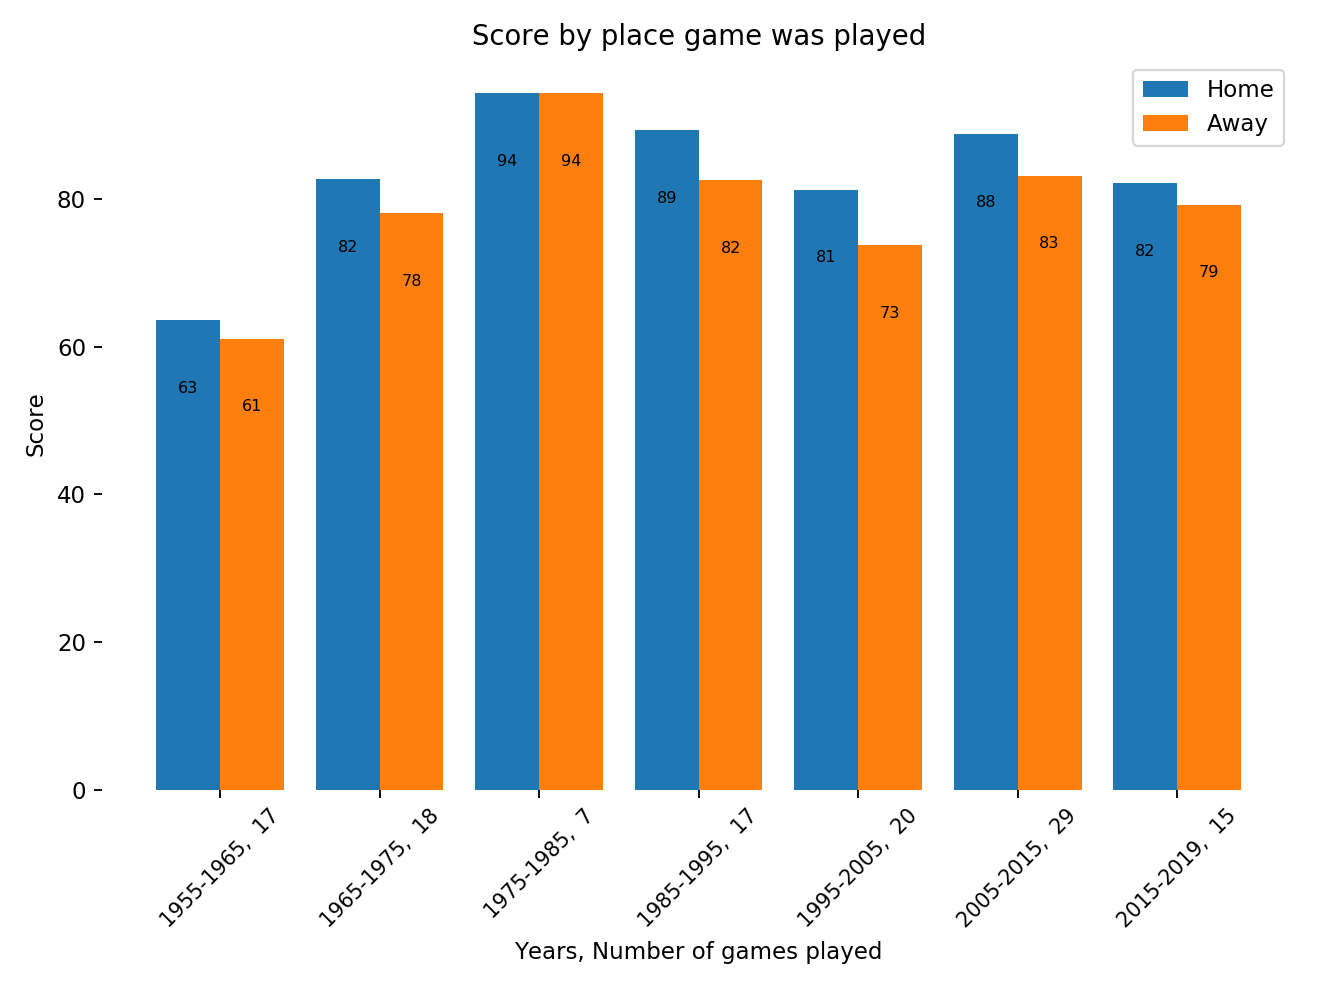

In [418]:
a = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
home_means = (list_dfs[0])['home_score']/(list_dfs[0])['total_games']
away_means = (list_dfs[0])['guest_score']/(list_dfs[0])['total_games']

x = np.arange(len(a))  # the label locations
width = 0.4  # the width of the bars
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
rects1 = ax.bar(x - width/2, home_means, width, label='Home')
rects2 = ax.bar(x + width/2, away_means, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Score by place game was played')
ax.set_xticks(x)
ax.set_xticklabels(a)
axes = plt.gca()
a = axes.get_xticks()
a = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
for i,text in enumerate (a):
    number_of_games = ',  '+str((list_dfs[0])['total_games'].iloc[i])
    a[i] = text+number_of_games
axes.set_xticklabels(a)
plt.xticks(rotation='45', size = 9)
plt.xlabel(xlabel = 'Years, Number of games played')
#remove spine
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.legend()
autolabel(rects1,-33)
autolabel(rects2,-33)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


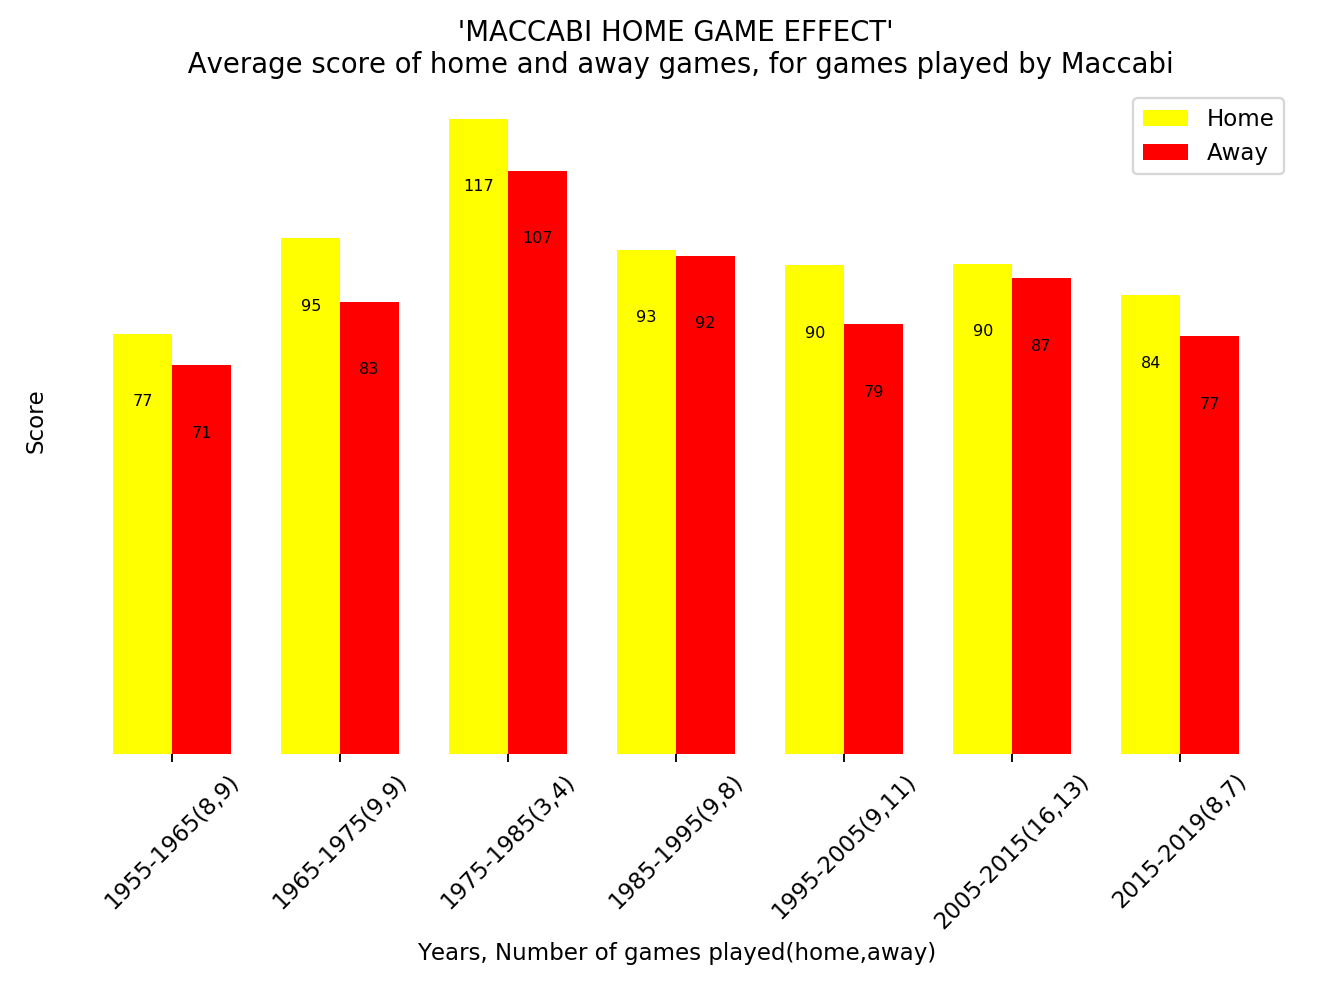

In [419]:
a = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
home_means = (list_dfs[1])['home_score']/(list_dfs[1])['total_games']
away_means = (list_dfs[2])['guest_score']/(list_dfs[2])['total_games']

x = np.arange(len(a))  # the label locations
width = 0.35  # the width of the bars
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
rects1 = ax.bar(x - width/2, home_means, width, label='Home', color='yellow')
rects2 = ax.bar(x + width/2, away_means, width, label='Away' , color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title(''' 'MACCABI HOME GAME EFFECT' \n Average score of home and away games, for games played by Maccabi''')
ax.set_xticks(x)
ax.set_xticklabels(a)
axes = plt.gca()
a = axes.get_xticks()
a = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
for i,text in enumerate (a):
    number_of_games = '('+str((list_dfs[1])['total_games'].iloc[i])+','+str((list_dfs[2])['total_games'].iloc[i])+')'
    a[i] = text+number_of_games
axes.set_xticklabels(a)
plt.xticks(rotation='45')
plt.xlabel(xlabel = 'Years, Number of games played(home,away)')
ax.legend()
autolabel(rects1,-33)
autolabel(rects2,-33)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.set_yticks([])
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


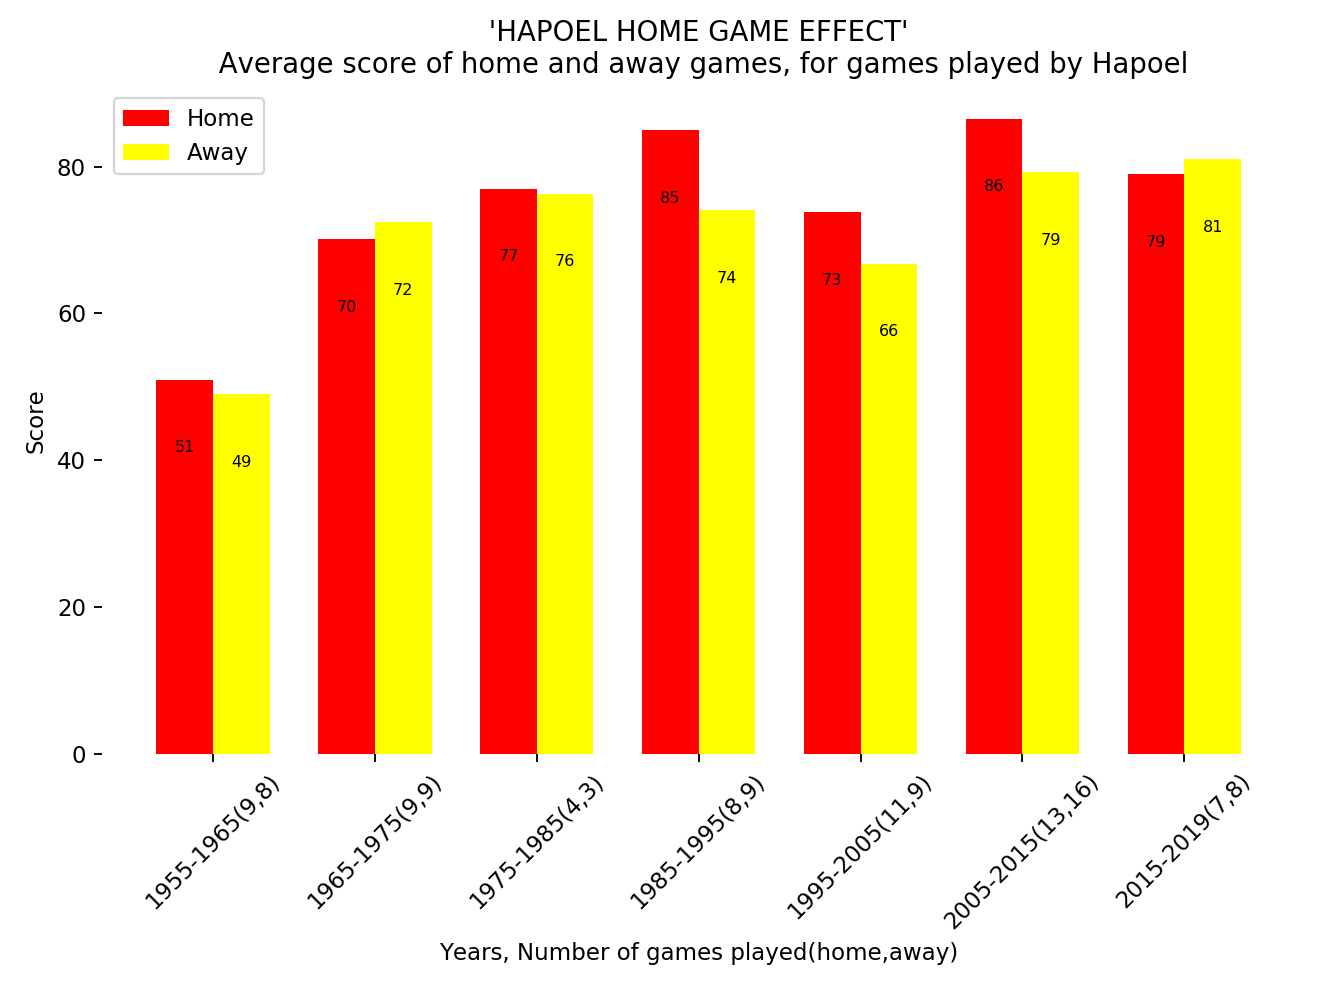

In [420]:
a = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
home_means = (list_dfs[2])['home_score']/(list_dfs[2])['total_games']
away_means = (list_dfs[1])['guest_score']/(list_dfs[1])['total_games']

x = np.arange(len(a))  # the label locations
width = 0.35  # the width of the bars
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
rects1 = ax.bar(x - width/2, home_means, width, label='Home', color='red')
rects2 = ax.bar(x + width/2, away_means, width, label='Away' , color='yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title(''' 'HAPOEL HOME GAME EFFECT' \n Average score of home and away games, for games played by Hapoel''')
ax.set_xticks(x)
ax.set_xticklabels(a)
axes = plt.gca()
a = axes.get_xticks()
a = ['1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005', '2005-2015', '2015-2019']
for i,text in enumerate (a):
    number_of_games = '('+str((list_dfs[2])['total_games'].iloc[i])+','+str((list_dfs[1])['total_games'].iloc[i])+')'
    a[i] = text+number_of_games
axes.set_xticklabels(a)
plt.xticks(rotation='45')
plt.xlabel(xlabel = 'Years, Number of games played(home,away)')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.legend()
autolabel(rects1,-33)
autolabel(rects2,-33)
plt.tight_layout()
plt.show()
